# Project 1 : PIMA Indians Diabetes 

## Objective 

Predict Diabetes diagonsis for Pima Females Indian

## Summary 

Data is related to Healthcare Industry having 768 observations with 9 variable. Target variable is **Outcome**. All patients here are females atleast 21 years old Pima Indian heritage 

## Dataset Info 

Pregnancies : Number of time pregnant

Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test 

BloodPressure : Diastolic Blood Pressure(mm Hg)

SkinThickness : Triceps skin fold thickness(mm)

Insulin : 2 hour serum insulin(mu U/ml)

BMI : Body Mass Index (weight in kg / (height in m)^2)

Diabetes Pedigree Function : A function which scores likelihood of diabetes based on family history

Age : Age(Years)

Outcome : Class variables(0 or 1) so 0 belongs to non-diabetic & 1 belongs to diabetic 

## Importing the Packages 

In [91]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style('darkgrid')

## Reading the dataset 

In [92]:
diab = pd.read_csv("/Users/abpandey4/Downloads/diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration 

Let us now explore our dataset to get a feel of what it looks like and get some insights about it.

In [93]:
print('Shape of Data is :',diab.shape)

Shape of Data is : (768, 9)


In [94]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**So from the info( ) we can see that there is no missing values**

In [95]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Well the descriptive analysis shows that variable Glucose, BoodPressure, SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers.I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense**

### Finding correlation of every pair of features and outcome variable and visualize the corr using heatmap

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


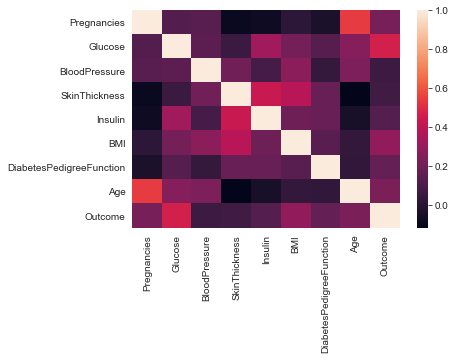

In [96]:
corr = diab.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)    
corr


## Data Cleaning 

**Let us check column name first and manipulate if any changes needed** 

In [97]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**I will change the DiabetesPedigreeFunction to DPF for convinient**

In [98]:
diab.rename({'DiabetesPedigreeFunction' : 'DPF'}, inplace = True ,axis = 1)
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Let us check the data type of the variable**

In [99]:
diab.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

## Preprocessing 

Data Cleaning is used to Make data tidy. Data Preprocessing is used to make data in way such that we can fit model to it.

## Missing values & Outliers

Let us look to missing values and handle them.

In [100]:
diab["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

We can see that minimum is 0 which may be considered as no Pregnancy, But maximum is 17 which is not making sense. Let us see distribution and also boxplot for outliers

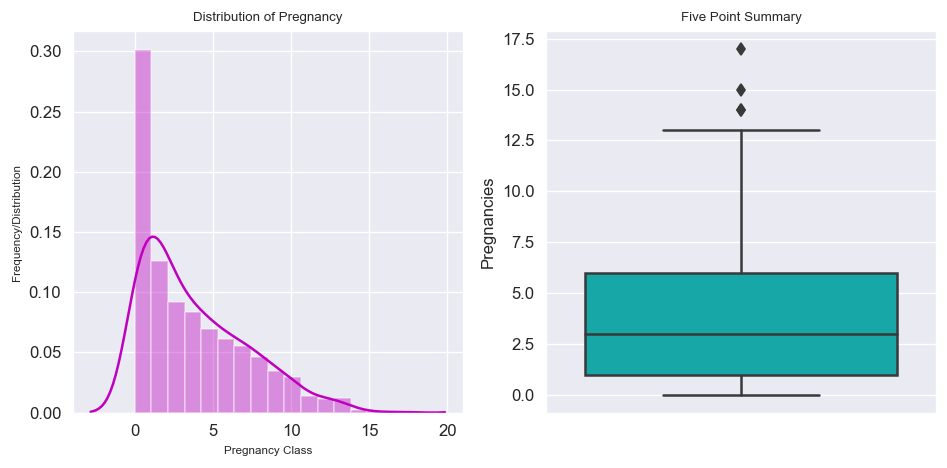

In [101]:
fig, axes = plt.subplots(nrows = 1,ncols = 2, dpi = 120, figsize = (8,4))

plot00 = sns.distplot(diab["Pregnancies"],ax = axes[0], color = 'm')
axes[0].set_title("Distribution of Pregnancy", fontdict = {'fontsize':8})
axes[0].set_xlabel("Pregnancy Class", fontdict = {'fontsize':7})
axes[0].set_ylabel("Frequency/Distribution", fontdict = {'fontsize': 7})
plt.tight_layout()

plot01 = sns.boxplot('Pregnancies',data = diab, ax = axes[1],orient = 'v', color = 'c' )
axes[1].set_title('Five Point Summary', fontdict = {'fontsize':8})
plt.tight_layout()

In [102]:
# Treating the outlier and thyen verifying it 

Quan = diab["Pregnancies"].quantile(0.99)
diab1 = diab[diab["Pregnancies"]< Quan]


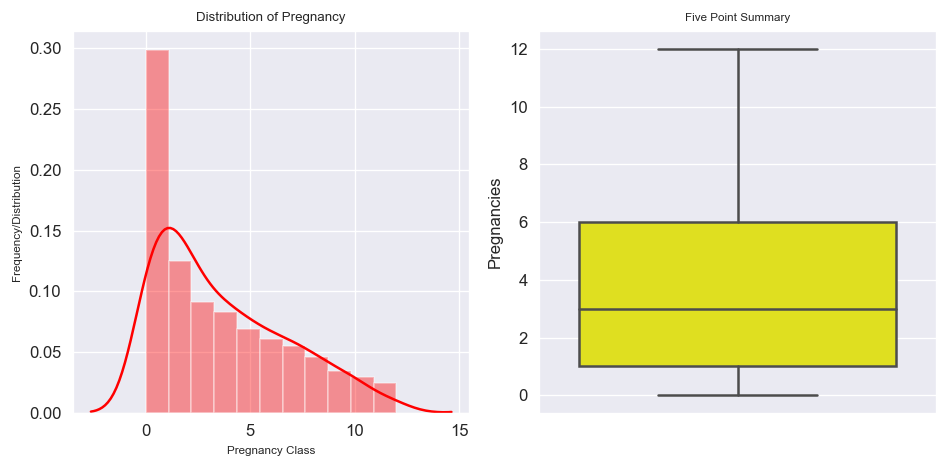

In [103]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize = (8,4))

plot00 = sns.distplot(diab1['Pregnancies'],ax = axes[0],color = 'red')
axes[0].set_title('Distribution of Pregnancy', fontdict = {'fontsize':8})
axes[0].set_xlabel('Pregnancy Class', fontdict = {'fontsize':7})
axes[0].set_ylabel('Frequency/Distribution', fontdict = {'fontsize':7})
plt.tight_layout()

plot01 = sns.boxplot('Pregnancies',data = diab1,ax = axes[1],orient = 'v' ,color = 'yellow')
axes[1].set_title('Five Point Summary', fontdict = {'fontsize': 7})
plt.tight_layout()

In [104]:
diab['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

**Glucose = 0 Does'nt make any sense**

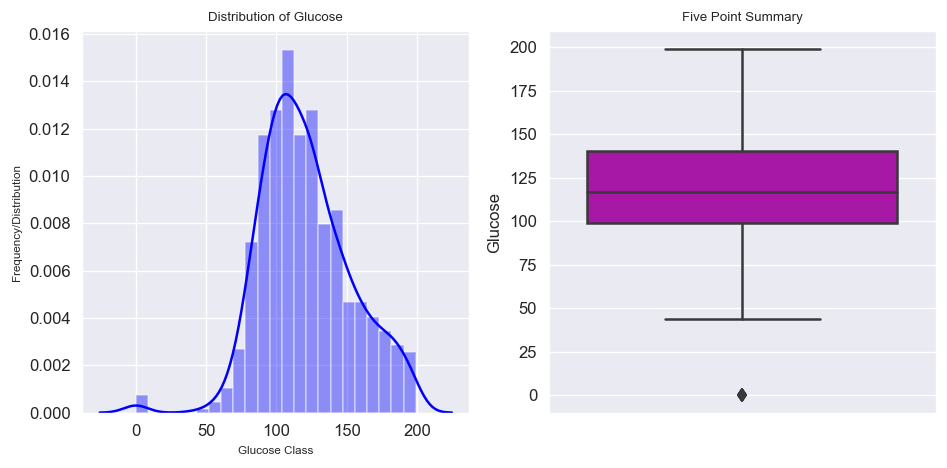

In [105]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize = (8,4))

plot00 = sns.distplot(diab['Glucose'], ax= axes[0], color = 'b')
axes[0].set_title('Distribution of Glucose', fontdict = {'fontsize':8})
axes[0].set_xlabel('Glucose Class', fontdict = {'fontsize':7})
axes[0].set_ylabel('Frequency/Distribution', fontdict = {'fontsize':7})
plt.tight_layout()

plot01 = sns.boxplot('Glucose',data= diab, ax=axes[1], orient = 'v',color = 'm')
axes[1].set_title('Five Point Summary', fontdict = {'fontsize':8})
plt.tight_layout()

In [106]:
diab['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [107]:
diab.Glucose = diab.Glucose.replace(0,diab.Glucose.mean())
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [108]:
Quan = diab["Glucose"].quantile(0.01)
diab2 = diab1[diab1["Glucose"] > Quan]

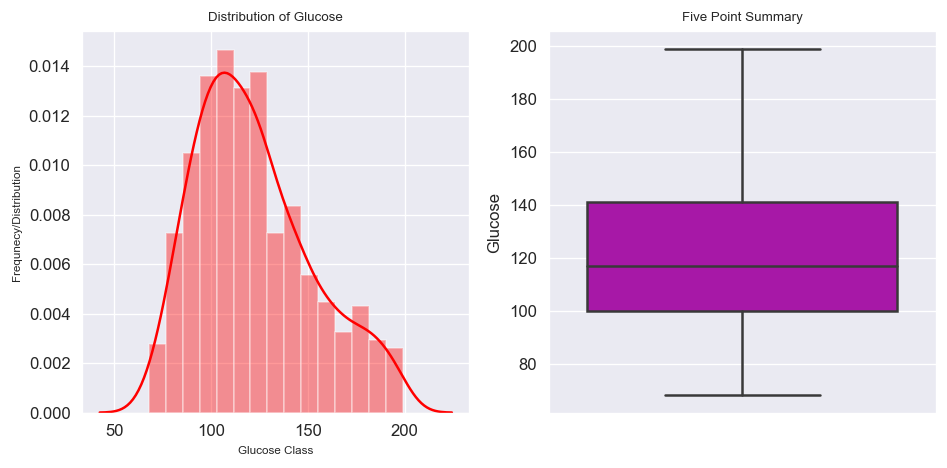

In [109]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize = (8,4))

plot00 = sns.distplot(diab2['Glucose'], ax=axes[0], color = 'r')
axes[0].set_title('Distribution of Glucose', fontdict = {'fontsize':8})
axes[0].set_xlabel('Glucose Class', fontdict = {'fontsize':7})
axes[0].set_ylabel('Frequnecy/Distribution', fontdict = {'fontsize':7})
plt.tight_layout()

plot01 = sns.boxplot('Glucose', data = diab2, ax=axes[1], orient = 'v', color = 'm')
axes[1].set_title('Five Point Summary', fontdict ={'fontsize':8} )
plt.tight_layout()

In [110]:
diab['Glucose'].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [111]:
diab['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

**We need to look up BP = 0**

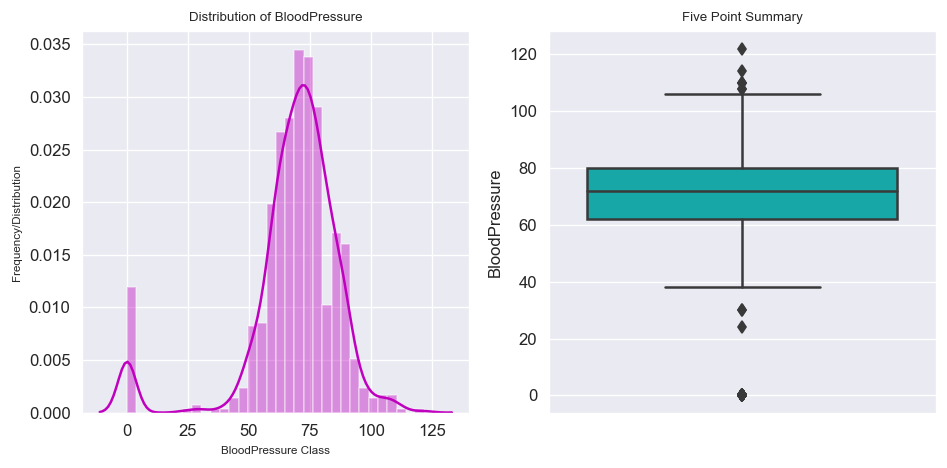

In [112]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi =120, figsize = (8,4))

plot00 = sns.distplot(diab['BloodPressure'], ax=axes[0], color = 'm')
axes[0].set_title('Distribution of BloodPressure', fontdict = {'fontsize':8})
axes[0].set_xlabel('BloodPressure Class', fontdict = {'fontsize':7})
axes[0].set_ylabel('Frequency/Distribution', fontdict = {'fontsize':7})
plt.tight_layout()

plot01 = sns.boxplot('BloodPressure', data = diab, ax=axes[1], orient = 'v', color= 'c')
axes[1].set_title('Five Point Summary', fontdict = {'fontsize':8})
plt.tight_layout()

In [113]:
diab.BloodPressure = diab.BloodPressure.replace(0,diab.BloodPressure.median())
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [114]:
Quan = diab["BloodPressure"].quantile(0.01)
diab3 = diab2[diab2['BloodPressure']>Quan]

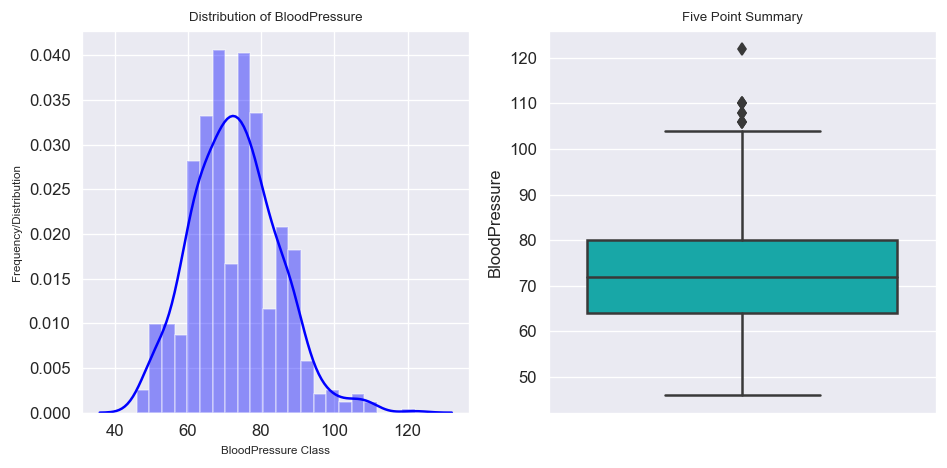

In [115]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize = (8,4))

plot00 = sns.distplot(diab3['BloodPressure'], ax=axes[0], color = 'b')
axes[0].set_title('Distribution of BloodPressure', fontdict = {'fontsize':8})
axes[0].set_xlabel('BloodPressure Class', fontdict = {'fontsize':7})
axes[0].set_ylabel('Frequency/Distribution', fontdict = {'fontsize':7})
plt.tight_layout()

plot01 = sns.boxplot('BloodPressure', data = diab3, ax=axes[1], orient = 'v', color = 'c')
axes[1].set_title('Five Point Summary', fontdict = {'fontsize':8})
plt.tight_layout()

**Now we can see that the ouliers in lower bound has been removed but the upper bound outlier is still remaining so we will do the elemination of outlier again.** 

In [116]:
Quan = diab["BloodPressure"].quantile(0.99)
diab4 = diab3[diab3['BloodPressure']<Quan]

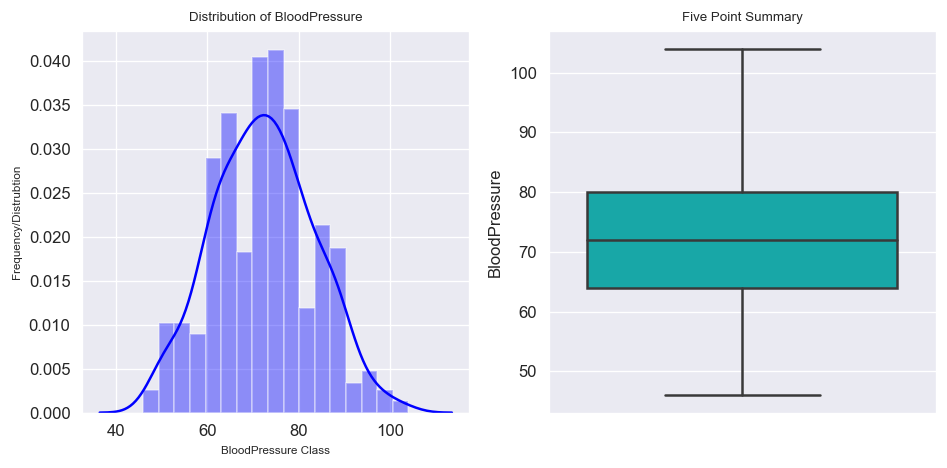

In [117]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab4['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=diab4,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Now we can see that there is not outlier present in the BloodPressure**

In [118]:
diab['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

**We need to look up SkinThickness = 0**

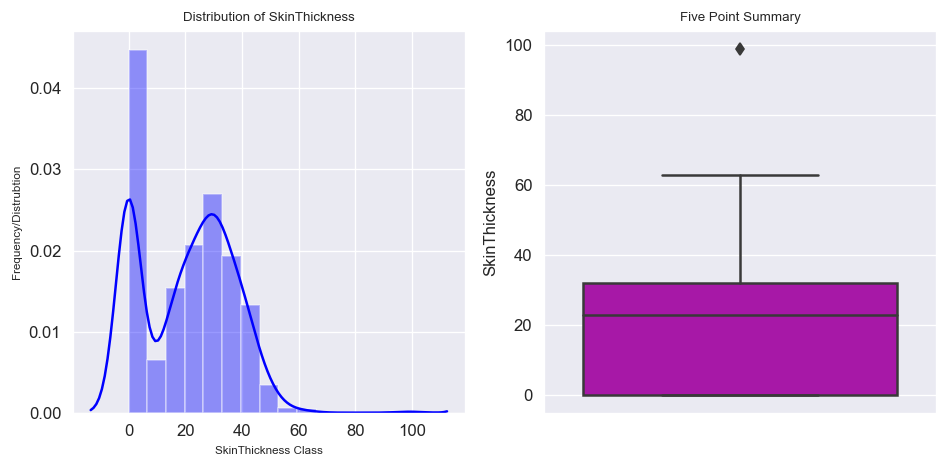

In [119]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=diab,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [120]:
diab.SkinThickness = diab.SkinThickness.replace(0,diab.SkinThickness.mean())
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.536458,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [121]:
Quan = diab["SkinThickness"].quantile(0.99)
diab5 = diab4[diab4["SkinThickness"]<Quan]

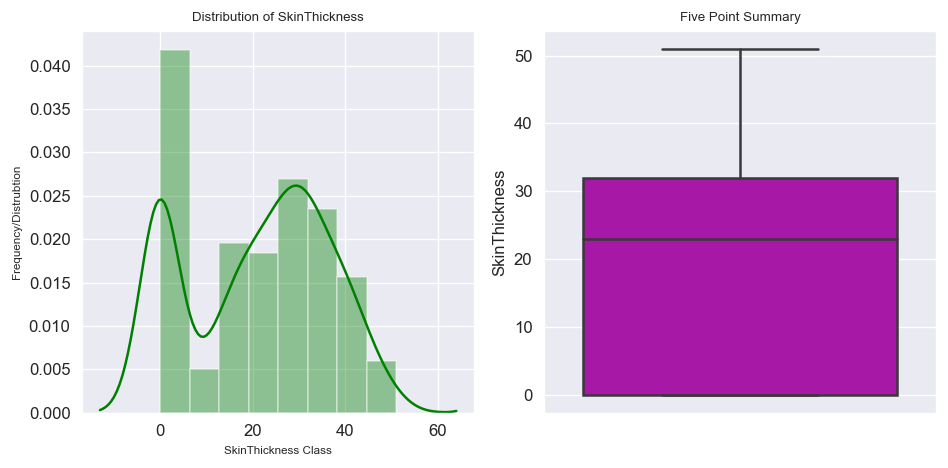

In [122]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab5['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=diab5,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [123]:
diab.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

**We need to look up Insulin = 0**

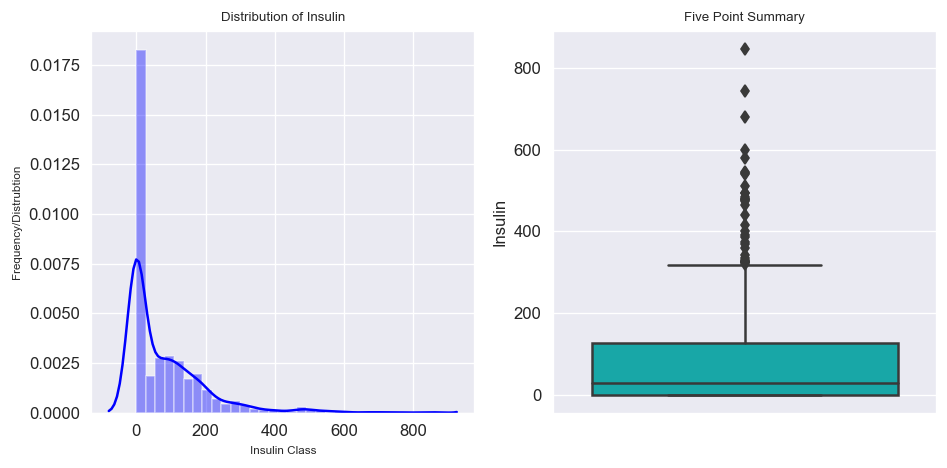

In [124]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=diab,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [125]:
diab.Insulin = diab.Insulin.replace(0,diab.Insulin.median())
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,1


In [126]:
Quan = diab["Insulin"].quantile(0.93)
diab6 = diab5[diab5["Insulin"]< Quan]

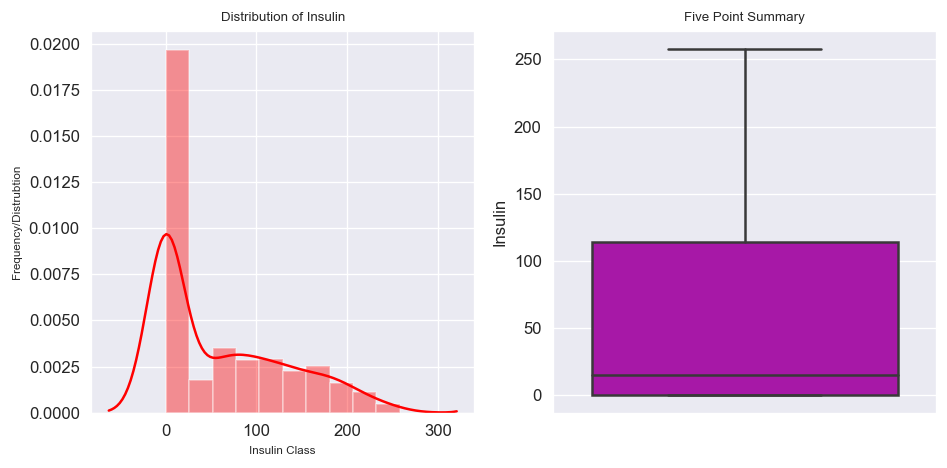

In [127]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab6['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=diab6,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [128]:
diab.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

**We need to look up BMI = 0**

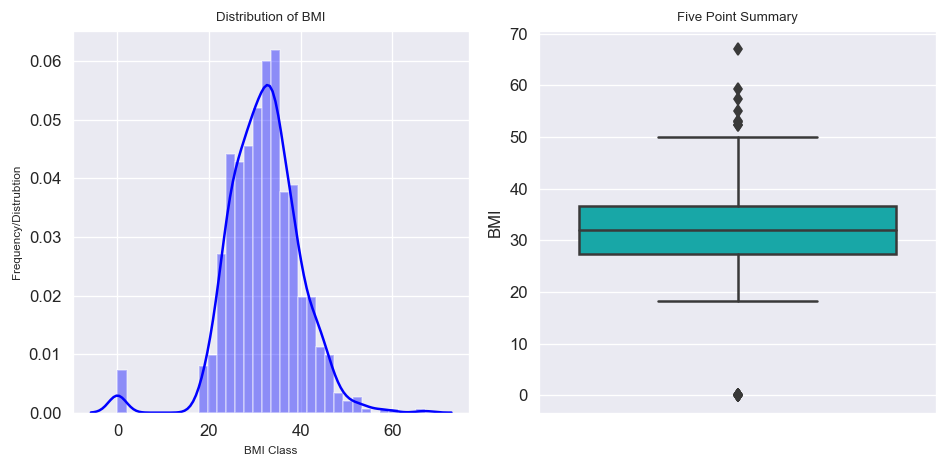

In [129]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=diab,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [130]:
diab.BMI = diab.BMI.replace(0,diab.BMI.mean())
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,1


In [131]:
Quan = diab["BMI"].quantile(0.0009)
diab7 = diab6[diab6["BMI"]>Quan]

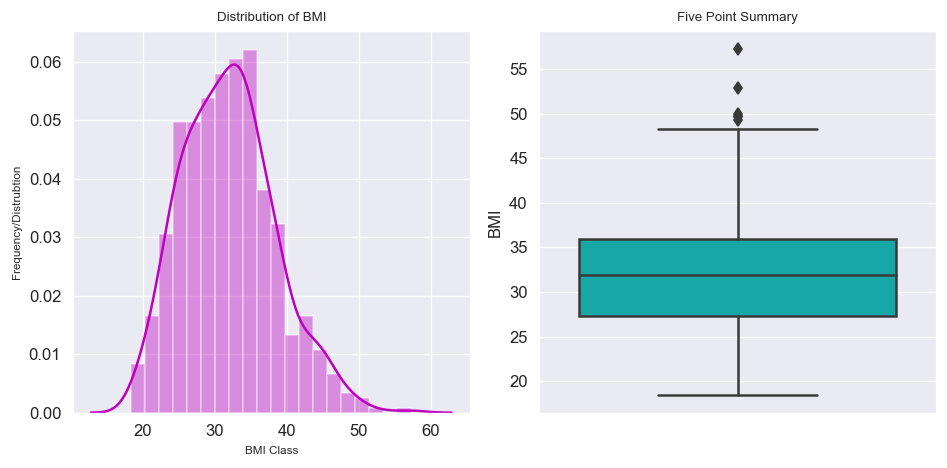

In [132]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab7['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=diab7,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [133]:
diab.DPF.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DPF, dtype: float64

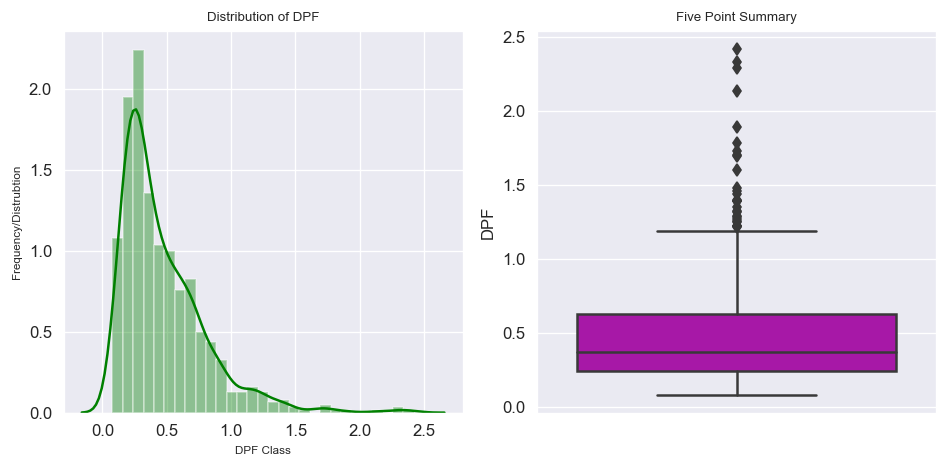

In [134]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=diab,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Outliers are present at higher end. Let us treat them.**

In [135]:
Quan = diab["DPF"].quantile(0.949)
diab8 = diab7[diab7["DPF"]< Quan]

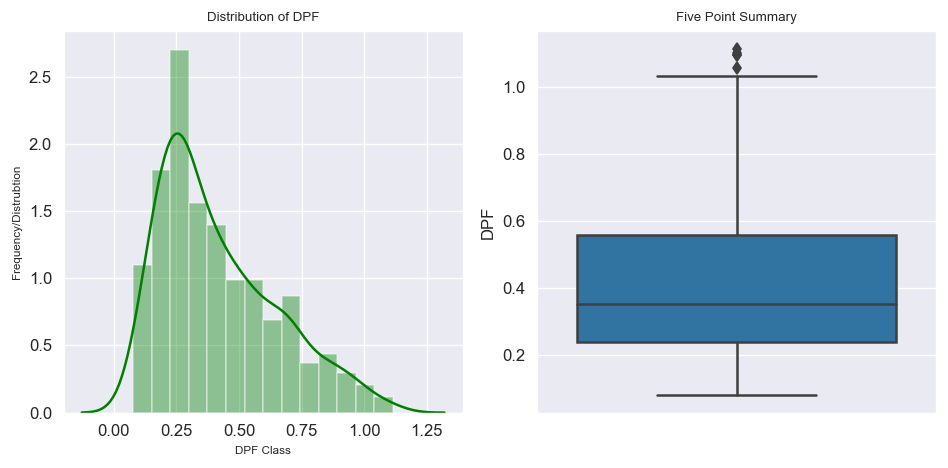

In [136]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab8['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=diab8,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [137]:
diab.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

**Let us look for the outliers**

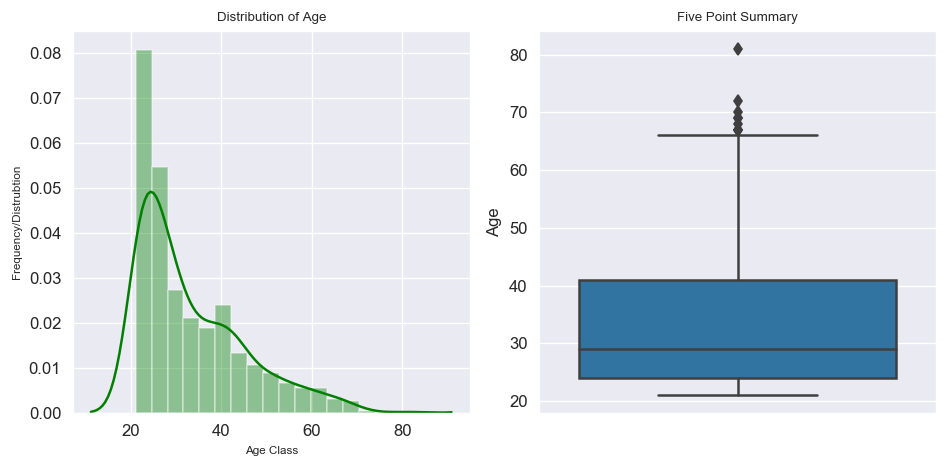

In [138]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=diab,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [139]:
Quan = diab["Age"].quantile(0.99)
diab9 = diab8[diab8["Age"]< Quan]

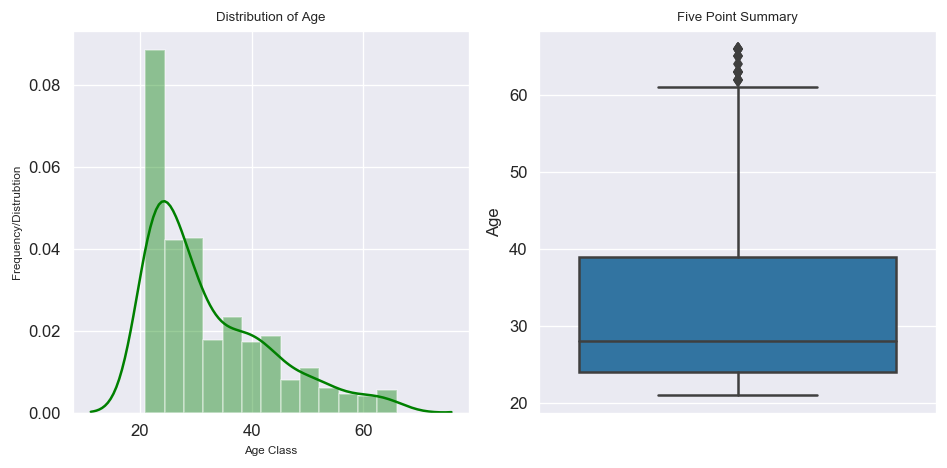

In [140]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diab9['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=diab9,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Now we are done with the outliers and missing values. Let us take look on the data and then move ahead to other steps**

In [141]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,1


In [142]:
diab.shape

(768, 9)

In [143]:
diab9.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [144]:
diab9.shape

(584, 9)

In [145]:
diab9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      584 non-null int64
Glucose          584 non-null int64
BloodPressure    584 non-null int64
SkinThickness    584 non-null int64
Insulin          584 non-null int64
BMI              584 non-null float64
DPF              584 non-null float64
Age              584 non-null int64
Outcome          584 non-null int64
dtypes: float64(2), int64(7)
memory usage: 45.6 KB


## Statistical Assumption 

Let us check for some assumption. Like Variance

In [146]:
diab9.var()

Pregnancies         9.468644
Glucose           779.994663
BloodPressure     121.862873
SkinThickness     230.122133
Insulin          5174.317289
BMI                41.310177
DPF                 0.054306
Age               120.991773
Outcome             0.214890
dtype: float64

**<font color = 'red'>I am removing DPF because variance is very low</font>**

In [147]:
diab9.drop('DPF',axis = 1,inplace = True)

/Users/abpandey4/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


**So here we can see that DPF is dropped**

In [148]:
diab9.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
5,5,116,74,0,0,25.6,30,0


## Spliting Data 

In [149]:
diab9.Outcome.value_counts()

0    402
1    182
Name: Outcome, dtype: int64

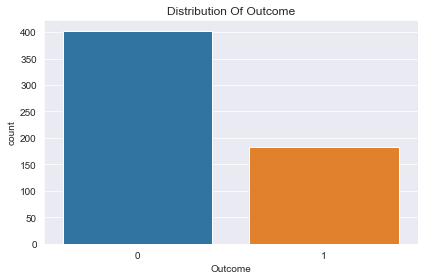

In [150]:
sns.countplot(diab9['Outcome']).set_title('Distribution Of Outcome')
plt.tight_layout()

In [151]:
X = diab9.iloc[:,:-1].values
y = diab9.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 7)
(117, 7)
(467,)
(117,)


## Decision Tree Classifier

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [63]:
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0])

In [64]:
print('Train set Accuracy is :',dtree.score(X_train, y_train))


Train set Accuracy is : 0.7708779443254818


**So we can see that we have 77% accuracy for train set data**

In [65]:
print('Test set Accuracy is :',dtree.score(X_test, y_test))

Test set Accuracy is : 0.7606837606837606


**We have 76% accuracy for test set data**

In [66]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

[[82  5]
 [23  7]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        87
           1       0.58      0.23      0.33        30

    accuracy                           0.76       117
   macro avg       0.68      0.59      0.59       117
weighted avg       0.73      0.76      0.72       117



## Now Visualizing the Decision Tree

In [67]:
import graphviz
import matplotlib.pyplot as plt, pydotplus
from IPython.display import Image, display
%matplotlib inline

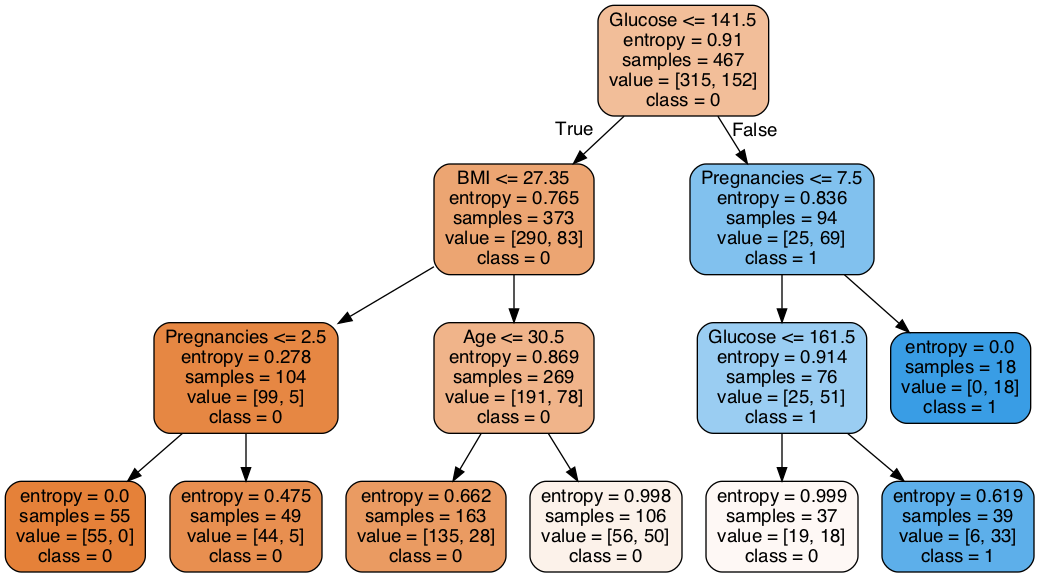

In [68]:
do_diab = tree.export_graphviz(dtree, filled = True, rounded= True,
                              feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age'],
                              class_names = ['0','1'])

gph = pydotplus.graph_from_dot_data(do_diab)
display(Image(gph.create_png()))

## ANN(Artificial Neural Network)

In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(X_train)
x_test_std = ss.transform(X_test)

In [72]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam 


**Intialising the ANN**

In [73]:
model = models.Sequential()

### Now We will Design our Neural Network 

**Adding the Hidden Layer. I'm adding 2 hidddn layer here**

In [75]:
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


**Adding the Output Layer**

In [76]:
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


**Compiling ANN**

In [78]:
from tensorflow.keras import optimizers
from tensorflow.keras import metrics 

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

## Fitting ANN to Training Set & Testing set 

In [79]:
model.fit(x_train_std, y_train, batch_size = 10, epochs = 200)


Epoch 1/200
467/467 [==============================] - 1s 2ms/sample - loss: 0.6902 - acc: 0.6617
Epoch 2/200
467/467 [==============================] - 0s 315us/sample - loss: 0.6816 - acc: 0.6745
Epoch 3/200
467/467 [==============================] - 0s 276us/sample - loss: 0.6671 - acc: 0.6745
Epoch 4/200
467/467 [==============================] - 0s 522us/sample - loss: 0.6256 - acc: 0.6745
Epoch 5/200
467/467 [==============================] - 0s 706us/sample - loss: 0.5544 - acc: 0.6745
Epoch 6/200
467/467 [==============================] - 0s 655us/sample - loss: 0.5202 - acc: 0.6745
Epoch 7/200
467/467 [==============================] - 0s 691us/sample - loss: 0.5123 - acc: 0.6745
Epoch 8/200
467/467 [==============================] - 0s 466us/sample - loss: 0.5065 - acc: 0.6745
Epoch 9/200
467/467 [==============================] - 0s 539us/sample - loss: 0.5017 - acc: 0.6745
Epoch 10/200
467/467 [==============================] - 0s 258us/sample - loss: 0.4973 - acc: 0.6745
E

Epoch 82/200
467/467 [==============================] - 0s 251us/sample - loss: 0.4545 - acc: 0.7901
Epoch 83/200
467/467 [==============================] - 0s 237us/sample - loss: 0.4532 - acc: 0.7901
Epoch 84/200
467/467 [==============================] - 0s 239us/sample - loss: 0.4528 - acc: 0.7944
Epoch 85/200
467/467 [==============================] - 0s 237us/sample - loss: 0.4527 - acc: 0.7966
Epoch 86/200
467/467 [==============================] - 0s 237us/sample - loss: 0.4527 - acc: 0.7901
Epoch 87/200
467/467 [==============================] - 0s 233us/sample - loss: 0.4515 - acc: 0.7944
Epoch 88/200
467/467 [==============================] - 0s 236us/sample - loss: 0.4516 - acc: 0.7987
Epoch 89/200
467/467 [==============================] - 0s 241us/sample - loss: 0.4509 - acc: 0.7923
Epoch 90/200
467/467 [==============================] - 0s 241us/sample - loss: 0.4509 - acc: 0.7923
Epoch 91/200
467/467 [==============================] - 0s 244us/sample - loss: 0.4508 - ac

In [80]:
model.fit(x_test_std, y_test, batch_size = 10, epochs = 200)

Epoch 1/200
117/117 [==============================] - 0s 418us/sample - loss: 0.4657 - acc: 0.7179
Epoch 2/200
117/117 [==============================] - 0s 370us/sample - loss: 0.4645 - acc: 0.7350
Epoch 3/200
117/117 [==============================] - 0s 385us/sample - loss: 0.4615 - acc: 0.7436
Epoch 4/200
117/117 [==============================] - 0s 317us/sample - loss: 0.4580 - acc: 0.7521
Epoch 5/200
117/117 [==============================] - 0s 376us/sample - loss: 0.4545 - acc: 0.7521
Epoch 6/200
117/117 [==============================] - 0s 295us/sample - loss: 0.4516 - acc: 0.7607
Epoch 7/200
117/117 [==============================] - 0s 358us/sample - loss: 0.4477 - acc: 0.7692
Epoch 8/200
117/117 [==============================] - 0s 345us/sample - loss: 0.4433 - acc: 0.7692
Epoch 9/200
117/117 [==============================] - 0s 371us/sample - loss: 0.4382 - acc: 0.7692
Epoch 10/200
117/117 [==============================] - 0s 381us/sample - loss: 0.4356 - acc: 0.7692

117/117 [==============================] - 0s 346us/sample - loss: 0.2583 - acc: 0.9231
Epoch 163/200
117/117 [==============================] - 0s 403us/sample - loss: 0.2565 - acc: 0.9145
Epoch 164/200
117/117 [==============================] - 0s 413us/sample - loss: 0.2560 - acc: 0.9060
Epoch 165/200
117/117 [==============================] - 0s 376us/sample - loss: 0.2574 - acc: 0.9231
Epoch 166/200
117/117 [==============================] - 0s 342us/sample - loss: 0.2536 - acc: 0.9231
Epoch 167/200
117/117 [==============================] - 0s 300us/sample - loss: 0.2518 - acc: 0.9231
Epoch 168/200
117/117 [==============================] - 0s 290us/sample - loss: 0.2515 - acc: 0.9145
Epoch 169/200
117/117 [==============================] - 0s 312us/sample - loss: 0.2501 - acc: 0.9145
Epoch 170/200
117/117 [==============================] - 0s 354us/sample - loss: 0.2482 - acc: 0.9231
Epoch 171/200
117/117 [==============================] - 0s 332us/sample - loss: 0.2491 - acc: 0

In [81]:
model.evaluate(x_train_std, y_train)

467/467 [==============================] - 0s 367us/sample - loss: 0.7335 - acc: 0.7559


[0.7335305406654162, 0.75588864]

In [82]:
model.evaluate(x_test_std, y_test)

117/117 [==============================] - 0s 132us/sample - loss: 0.2204 - acc: 0.9145


[0.22042824251529497, 0.9145299]

In [83]:
model.metrics_names

['loss', 'acc']

**So now we can see that the accuracy for train set is 76% & accuracy for test set is 89%**

## Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                             random_state = 3)

rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [158]:
pred = rfc.predict(X_test)
pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0])

In [159]:
print(rfc.score(X_train, y_train))

0.9764453961456103


In [160]:
print(rfc.score(X_test, y_test))

0.7863247863247863


In [162]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[79  8]
 [17 13]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        87
           1       0.62      0.43      0.51        30

    accuracy                           0.79       117
   macro avg       0.72      0.67      0.69       117
weighted avg       0.77      0.79      0.77       117



## We have done Decision Tree Classifier , ANN Classifier & Random Forest Classifier

**Where we can see that the Decision Tree Classifier has been the best predicted** 